In [42]:
import pandas as pd
import numpy as np
import seaborn as sns

In [19]:
import glob
import pandas as pd
directoryPath = 'data_preprocessed/'
df = pd.DataFrame()
for file_name in glob.glob(directoryPath+'*.xlsx'):
    x = pd.read_excel(file_name)
    df = pd.concat([df,x],axis=0)

In [21]:
df.shape

(28317, 40)

In [27]:
df.iloc[:4,10:20]

,Fuel Rate (L-Hr),Vehicle Speed,Inj Q Cur (mg-st),Inj Q Tor (mg-st),Boost Pressure (mBar),Atmospheric Pressure (mBar),Coolant Temperature (*C),Oil Temperature (*C),Boost Temperature (*C),Oil Pressure (mBar)
0,9.85,42.08,44.42,44.52,1177,924,87.3,90.1,40.4,3994
1,9.85,42.56,44.36,44.38,1181,924,87.3,90.1,40.3,4136
2,9.85,42.71,43.82,44.12,1185,924,87.3,90.1,40.3,4035
3,8.60,42.77,38.48,38.50,1188,924,87.3,90.1,40.3,4021


In [77]:
# creating dataframe of 3 features from the original dataframe of 40 features
cols = ['RPM', 'TPS (%)', 'Inj Q Tor (mg-st)']
df_data = df[cols]
df_data.reset_index(drop=True)

,RPM,TPS (%),Inj Q Tor (mg-st)
0,1033.0,44.4,44.52
1,1037.0,44.8,44.38
2,1047.5,44.0,44.12
3,1041.5,38.4,38.50
4,1050.5,29.2,22.00
...,...,...,...
28312,0.0,0.0,0.00
28313,0.0,0.0,0.00
28314,0.0,0.0,0.00
28315,0.0,0.0,0.00


In [78]:
# null values checking
df_data.isnull().sum()

RPM                  0
TPS (%)              0
Inj Q Tor (mg-st)    0
dtype: int64

In [79]:
# stats values
df_data.describe()

,RPM,TPS (%),Inj Q Tor (mg-st)
count,28317.000000,28317.000000,28317.000000
mean,871.009076,23.836536,25.792261
std,273.634087,23.828555,21.087050
min,0.000000,0.000000,0.000000
25%,600.000000,0.000000,7.960000
50%,961.000000,23.600000,19.780000
75%,1102.000000,42.400000,42.860000
max,1733.000000,100.000000,86.820000


In [80]:
df_data['RPM']

0      1033.0
1      1037.0
2      1047.5
3      1041.5
4      1050.5
        ...  
305       0.0
306       0.0
307       0.0
308       0.0
309       0.0
Name: RPM, Length: 28317, dtype: float64

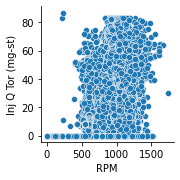

In [81]:
pp = sns.pairplot(data=df_data,
                  y_vars=['Inj Q Tor (mg-st)'],
                  x_vars=['RPM'])

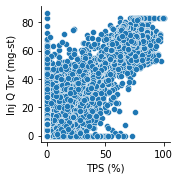

In [82]:
pp = sns.pairplot(data=df_data,
                  y_vars=['Inj Q Tor (mg-st)'],
                  x_vars=['TPS (%)'])

C:\Users\kishan\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TPS (%)', ylabel='Density'>

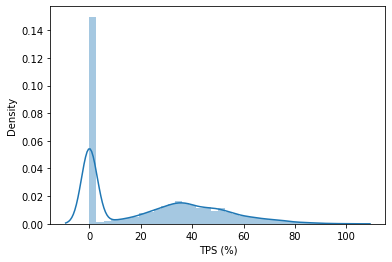

In [83]:
sns.distplot(df_data['TPS (%)'])

C:\Users\kishan\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RPM', ylabel='Density'>

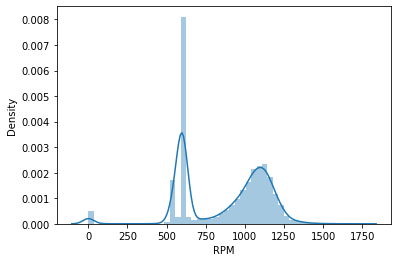

In [88]:
sns.distplot(df_data['RPM'])

In [97]:
Q1 = df_data.quantile(0.45)
Q3 = df_data.quantile(0.75)
IQR = Q3 - Q1
new_df = df_data[~((df_data < (Q1 - 1.5 * IQR)) |(df_data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [98]:
new_df.shape

(18059, 3)

C:\Users\kishan\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RPM', ylabel='Density'>

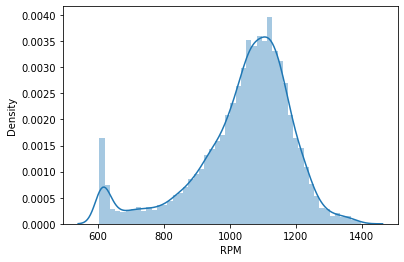

In [99]:
sns.distplot(new_df['RPM'])

C:\Users\kishan\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TPS (%)', ylabel='Density'>

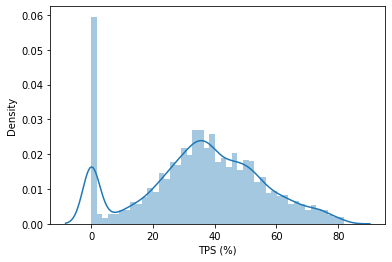

In [100]:
sns.distplot(new_df['TPS (%)'])

In [103]:
new_df[new_df['TPS (%)'] == 0]

,RPM,TPS (%),Inj Q Tor (mg-st)
183,1038.5,0.0,0.00
192,760.0,0.0,0.00
193,605.0,0.0,1.66
194,613.0,0.0,3.86
369,1168.0,0.0,29.94
...,...,...,...
33,604.0,0.0,11.46
40,611.0,0.0,27.26
43,603.5,0.0,8.08
56,605.0,0.0,14.42


In [105]:
new_df_final = new_df.loc[~(new_df['TPS (%)'] == 0)]

In [107]:
new_df_final.shape

(16168, 3)

C:\Users\kishan\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TPS (%)', ylabel='Density'>

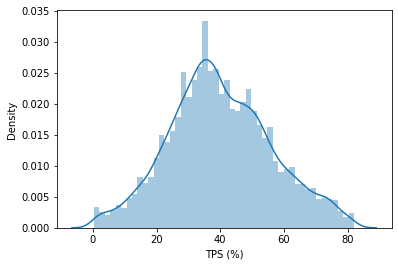

In [108]:
sns.distplot(new_df_final['TPS (%)'])

C:\Users\kishan\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RPM', ylabel='Density'>

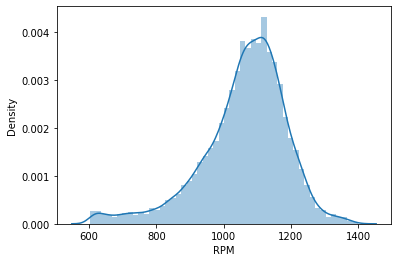

In [109]:
sns.distplot(new_df_final['RPM'])

In [110]:
new_df_final['RPM'].skew()

-0.9341208962917202

In [111]:
from scipy import stats

In [115]:
che = stats.boxcox(new_df_final['RPM'])[0]
pd.Series(che).skew()

0.006576248655005462

C:\Users\kishan\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

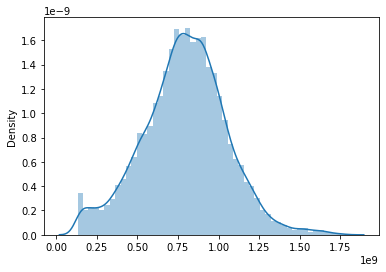

In [116]:
sns.distplot(che)

In [117]:
che

array([6.97707689e+08, 7.06108745e+08, 7.28486881e+08, ...,
       6.98754099e+08, 1.32397745e+08, 1.33418694e+08])

In [118]:
new_df_final['TPS (%)'].skew()

0.17349431598142528